In [376]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("notebook")
# sns.set_style("darkgrid")
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [377]:
dar_path_dict_dict = {
    y: {
        z.split("/")[-1].split("__")[-2]: z
        for z in sorted(glob.glob("downstream_analysis/DARs/" + y + "/*__DARs.bed"))
    }
    for y in [x.split("/")[-1] for x in sorted(glob.glob("downstream_analysis/DARs/*"))]
}
dar_path_dict_dict

{'10xmultiome_celltypefair_1.FIXEDCELLS': {'B_cell': 'downstream_analysis/DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__B_cell__DARs.bed',
  'CD14+_monocyte': 'downstream_analysis/DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__CD14+_monocyte__DARs.bed',
  'CD16+_monocyte': 'downstream_analysis/DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__CD16+_monocyte__DARs.bed',
  'CD4+_T_cell': 'downstream_analysis/DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__CD4+_T_cell__DARs.bed',
  'Cytotoxic_T_cell': 'downstream_analysis/DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell__DARs.bed',
  'Dendritic_cell': 'downstream_analysis/DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__Dendritic_cell__DARs.bed',
  'Natural_killer_cell': 'downstream_analysis/DARs/10xmultiome_celltypefair_1

In [378]:
df_merged = pd.DataFrame()
df_merged_10k = pd.DataFrame()
df_lens = pd.DataFrame()
for sample, dar_path_dict in dar_path_dict_dict.items():
    print(sample)
    for cell_type, dar_path in dar_path_dict.items():
        print(cell_type)
        df = pd.read_csv(dar_path, sep="\t", header=None)
        df["sample"] = sample
        df_merged = pd.concat([df_merged, df.iloc[:2000]])
        df_merged_10k = pd.concat([df_merged_10k, df.iloc[:10000]])
        df_lens.at[sample, cell_type] = len(df)

10xmultiome_celltypefair_1.FIXEDCELLS
B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell
10xv11_celltypefair_1.FIXEDCELLS
B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell
10xv1_celltypefair_1.FIXEDCELLS
B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell
10xv2_celltypefair_1.FIXEDCELLS
B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell
ddseq_celltypefair_1.FIXEDCELLS
B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell
hydrop_celltypefair_1.FIXEDCELLS
B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell
mtscatac_celltypefair_1.FIXEDCELLS
B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell
s3atac_celltypefair_1.FIXEDCELLS
B_cell
CD14+_monocyte
CD1

In [379]:
df_merged.columns = [
    "chrom",
    "start",
    "end",
    "cell_type",
    "logfc",
    "strand",
    "p_val",
    "sample",
]
df_merged_10k.columns = [
    "chrom",
    "start",
    "end",
    "cell_type",
    "logfc",
    "strand",
    "p_val",
    "sample",
]

In [380]:
df_merged["tech"] = [x.split("_")[0] for x in df_merged["sample"]]
df_merged_10k["tech"] = [x.split("_")[0] for x in df_merged_10k["sample"]]

In [381]:
df_merged_10k.groupby("tech")["cell_type"].value_counts()

tech         cell_type          
10xmultiome  B_cell                 10000
             CD14+_monocyte         10000
             CD16+_monocyte         10000
             Dendritic_cell         10000
             CD4+_T_cell             8120
             Cytotoxic_T_cell        8114
             Natural_killer_cell     6471
10xv1        B_cell                 10000
             CD14+_monocyte         10000
             CD16+_monocyte         10000
             Cytotoxic_T_cell       10000
             Dendritic_cell         10000
             CD4+_T_cell             8215
             Natural_killer_cell     7741
10xv11       B_cell                 10000
             CD14+_monocyte         10000
             CD16+_monocyte         10000
             Cytotoxic_T_cell       10000
             Dendritic_cell         10000
             Natural_killer_cell     8089
             CD4+_T_cell             8042
10xv2        B_cell                 10000
             CD14+_monocyte         10000
 

In [382]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}

cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "CD4+ T cells",
    "Cytotoxic_T_cell": "CD8+ T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
    "CD14+_monocyte",
    "CD16+_monocyte",
    "Dendritic_cell",
]

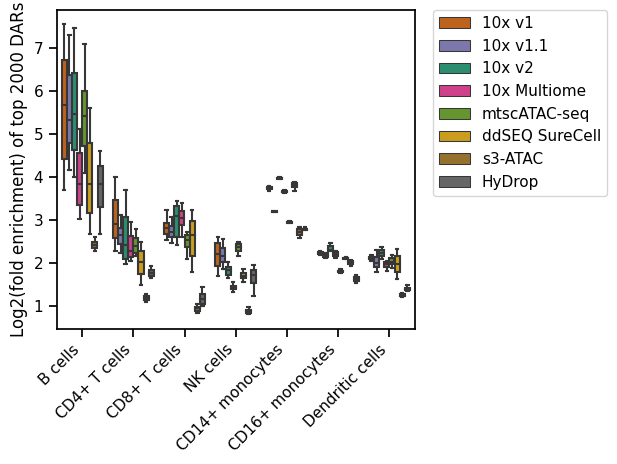

In [383]:
fig, ax = plt.subplots()
sns.boxplot(
    df_merged,
    x="cell_type",
    y="logfc",
    hue="tech",
    order=cell_type_order,
    hue_order=tech_order,
    palette=tech_color_palette,
    ax=ax,
    fliersize=0,
)
plt.xticks(rotation=45, ha="right")

plt.ylabel("Log2(fold enrichment) of top 2000 DARs")
plt.xlabel("")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels_alias = [cell_type_alias_dict[x] for x in labels]
ax.set_xticklabels(labels_alias)


handles, labels = ax.get_legend_handles_labels()
l = plt.legend(
    handles[0 : len(tech_order)],
    [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0.0,
)
plt.tight_layout()
plt.savefig(
    "plts_final/FIXEDCELLS__top2k_DARs_logfc.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS__top2k_DARs_logfc.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

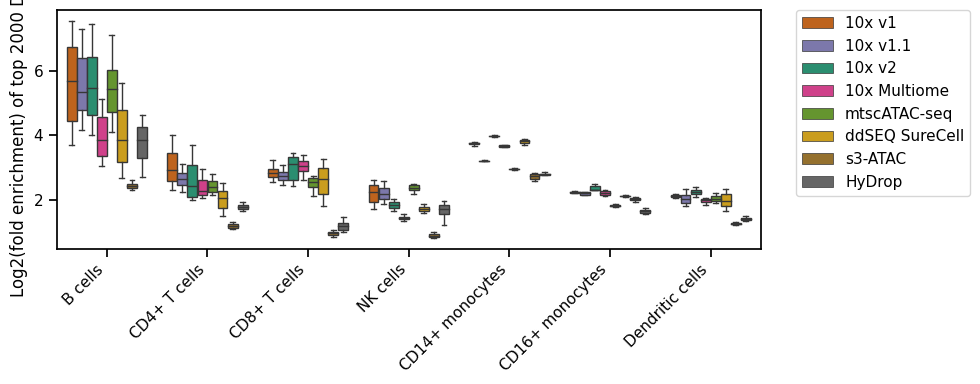

In [384]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(
    df_merged,
    x="cell_type",
    y="logfc",
    hue="tech",
    order=cell_type_order,
    hue_order=tech_order,
    palette=tech_color_palette,
    ax=ax,
    fliersize=0,
    linewidth=1,
)
plt.xticks(rotation=45, ha="right")

plt.ylabel("Log2(fold enrichment) of top 2000 DARs")
plt.xlabel("")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels_alias = [cell_type_alias_dict[x] for x in labels]
ax.set_xticklabels(labels_alias)


handles, labels = ax.get_legend_handles_labels()
l = plt.legend(
    handles[0 : len(tech_order)],
    [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0.0,
)
plt.tight_layout()
# plt.savefig(
#     "plts_final/FIXEDCELLS__top2k_DARs_logfc.png",
#     dpi=600,
#     facecolor="white",
#     bbox_inches="tight",
# )
# plt.savefig(
#     "plts_final/FIXEDCELLS__top2k_DARs_logfc.svg",
#     dpi=600,
#     facecolor="white",
#     bbox_inches="tight",
# )

In [385]:
df_merged["fc"] = 2 ** df_merged["logfc"]

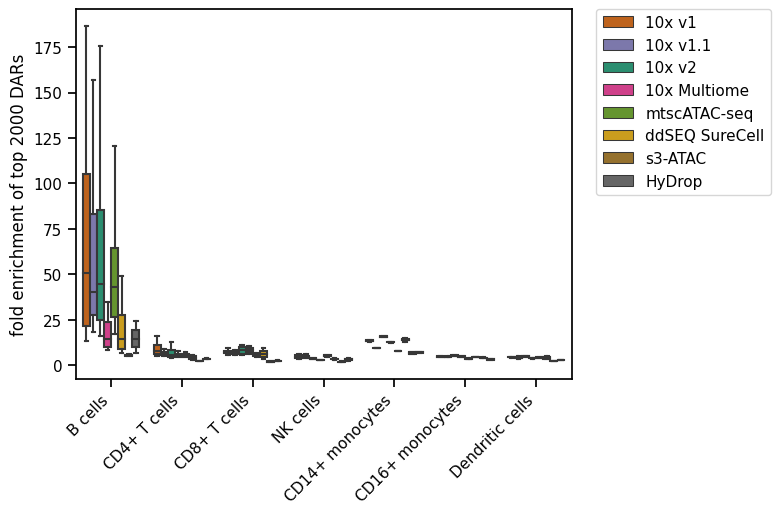

In [386]:
fig, ax = plt.subplots()
sns.boxplot(
    df_merged,
    x="cell_type",
    y="fc",
    hue="tech",
    order=cell_type_order,
    hue_order=tech_order,
    palette=tech_color_palette,
    ax=ax,
    fliersize=0,
)
plt.xticks(rotation=45, ha="right")
plt.ylabel("fold enrichment of top 2000 DARs")
plt.xlabel("")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels_alias = [cell_type_alias_dict[x] for x in labels]
ax.set_xticklabels(labels_alias)


handles, labels = ax.get_legend_handles_labels()
l = plt.legend(
    handles[0 : len(tech_order)],
    [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0.0,
)
# plt.tight_layout()
# plt.savefig(
#     "plts_final/FIXEDCELLS__top2k_DARs_fc.png",
#     dpi=600,
#     facecolor="white",
#     bbox_inches="tight",
# )
# plt.savefig(
#     "plts_final/FIXEDCELLS__top2k_DARs_fc.svg",
#     dpi=600,
#     facecolor="white",
#     bbox_inches="tight",
# )

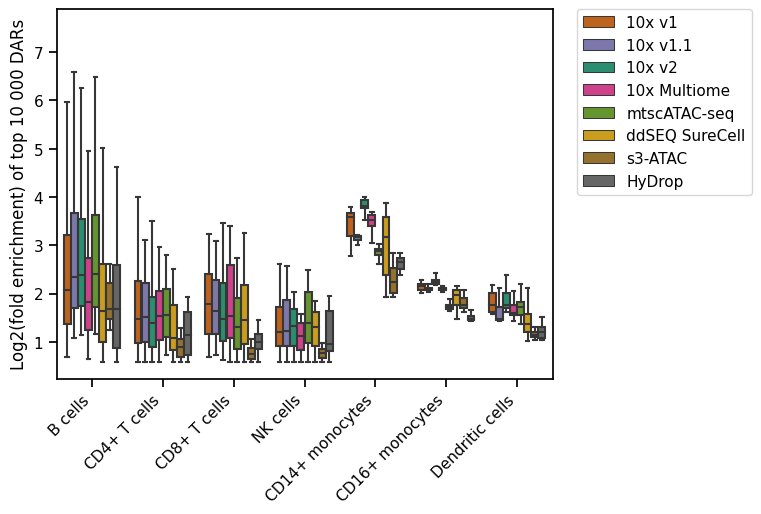

In [387]:
fig, ax = plt.subplots()
sns.boxplot(
    df_merged_10k,
    x="cell_type",
    y="logfc",
    hue="tech",
    order=cell_type_order,
    hue_order=tech_order,
    palette=tech_color_palette,
    ax=ax,
    fliersize=0,
)
plt.xticks(rotation=45, ha="right")

plt.ylabel("Log2(fold enrichment) of top 10 000 DARs")
plt.xlabel("")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels_alias = [cell_type_alias_dict[x] for x in labels]
ax.set_xticklabels(labels_alias)


handles, labels = ax.get_legend_handles_labels()
l = plt.legend(
    handles[0 : len(tech_order)],
    [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0.0,
)
# plt.tight_layout()
# plt.savefig(
#     "plts_final/FIXEDCELLS__top10k_DARs_logfc.png",
#     dpi=600,
#     facecolor="white",
#     bbox_inches="tight",
# )
# plt.savefig(
#     "plts_final/FIXEDCELLS__top10k_DARs_logfc.svg",
#     dpi=600,
#     facecolor="white",
#     bbox_inches="tight",
# )

# pivoted heatmap

In [388]:
df_merged_pivot = df_merged.pivot_table(
    values="logfc", index="tech", columns="cell_type", aggfunc="median"
)
df_merged_pivot = df_merged_pivot.loc[tech_order]
df_merged_pivot = df_merged_pivot[cell_type_order]

df_merged_pivot.index = [tech_alias_dict[x] for x in df_merged_pivot.index]

df_merged_pivot.columns = [cell_type_alias_dict[x] for x in df_merged_pivot.columns]

In [389]:
df_merged_pivot

,B cells,CD4+ T cells,CD8+ T cells,NK cells,CD14+ monocytes,CD16+ monocytes,Dendritic cells
10x v1,5.664408,2.905426,2.821804,2.223473,3.747263,2.226693,2.108290
10x v1.1,5.334943,2.650302,2.723493,2.175836,3.199360,2.194950,2.005427
10x v2,5.472094,2.432296,3.095187,1.832132,3.972217,2.307177,2.245590
10x Multiome,3.844759,2.276753,3.048900,1.429891,3.660674,2.215788,1.991630
mtscATAC-seq,5.429889,2.405876,2.545160,2.369649,2.948940,1.806223,2.028051
ddSEQ SureCell,3.838991,2.036696,2.646857,1.712441,3.812028,2.115012,1.970235
s3-ATAC,2.412932,1.178967,0.953319,0.884662,2.721162,2.020399,1.247453
HyDrop,3.839368,1.767611,1.168178,1.720193,2.794902,1.632655,1.397485


In [390]:
cell_type_alias_dict

{'B_cell': 'B cells',
 'CD14+_monocyte': 'CD14+ monocytes',
 'CD4+_T_cell': 'CD4+ T cells',
 'Cytotoxic_T_cell': 'CD8+ T cells',
 'Dendritic_cell': 'Dendritic cells',
 'Natural_killer_cell': 'NK cells',
 'CD16+_monocyte': 'CD16+ monocytes'}

### in real values

In [391]:
from sklearn.preprocessing import minmax_scale

In [392]:
df_merged_pivot_abs = 2**df_merged_pivot

df_merged_pivot_abs_normalized = df_merged_pivot_abs.transform(
    lambda x: minmax_scale(x.astype(float))
)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'B cells'),
  Text(1.5, 0, 'CD4+ T cells'),
  Text(2.5, 0, 'CD8+ T cells'),
  Text(3.5, 0, 'NK cells'),
  Text(4.5, 0, 'CD14+ monocytes'),
  Text(5.5, 0, 'CD16+ monocytes'),
  Text(6.5, 0, 'Dendritic cells')])

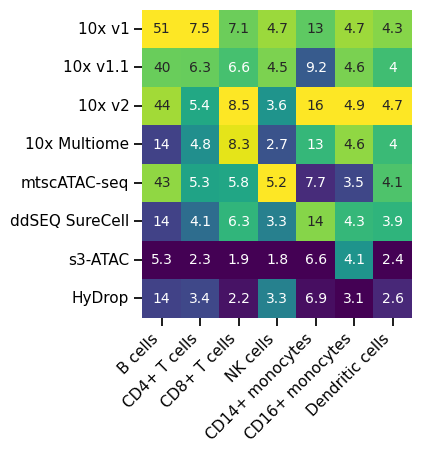

In [393]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(
    data=df_merged_pivot_abs_normalized,
    square=True,
    cmap="viridis",
    ax=ax,
    annot=df_merged_pivot_abs,
    annot_kws={"fontsize": 10},
    cbar=False,
)
plt.xticks(rotation=45, ha="right")

# sns.heatmap(
#     data=df_merged_pivot_abs, ax=ax, cmap="viridis", annot=True, square=True, alpha=0
# )

# plt.xticks(rotation=45, ha="right")
# plt.title("Fold change enrichment of\n2000 strongest DARs")
# plt.savefig(
#     "plts_final/FIXEDCELLS__top2k_DARs_fc_heatmap.png",
#     dpi=600,
#     facecolor="white",
#     bbox_inches="tight",
# )
# plt.savefig(
#     "plts_final/FIXEDCELLS__top2k_DARs_fc_heatmap.svg",
#     dpi=600,
#     facecolor="white",
#     bbox_inches="tight",
# )

# n_DARs

In [394]:
df_lens.index = [x.split("_")[0] for x in df_lens.index]

In [395]:
df_lens = df_lens.loc[tech_order]
# df_lens = df_lens[cell_type_order]

# df_lens.index = [tech_alias_dict[x] for x in df_lens.index]

# df_lens.columns = [cell_type_alias_dict[x] for x in df_lens.columns]
df_lens_normalized = df_lens.transform(lambda x: minmax_scale(x.astype(float)))

In [396]:
df_lens

,B_cell,CD14+_monocyte,CD16+_monocyte,CD4+_T_cell,Cytotoxic_T_cell,Dendritic_cell,Natural_killer_cell
10xv1,10434.0,21596.0,21681.0,8215.0,10717.0,22482.0,7741.0
10xv11,12019.0,26157.0,26435.0,8042.0,10950.0,28129.0,8089.0
10xv2,12388.0,24652.0,24953.0,9114.0,10267.0,27012.0,7182.0
10xmultiome,10236.0,22890.0,22956.0,8120.0,8114.0,24718.0,6471.0
mtscatac,12392.0,33704.0,33968.0,11051.0,9534.0,34768.0,9736.0
ddseq,8391.0,15925.0,16113.0,5900.0,5986.0,17304.0,6536.0
s3atac,14716.0,33062.0,33036.0,10215.0,7064.0,34977.0,6008.0
hydrop,8396.0,27094.0,26321.0,8923.0,4088.0,28625.0,5234.0


<AxesSubplot: >

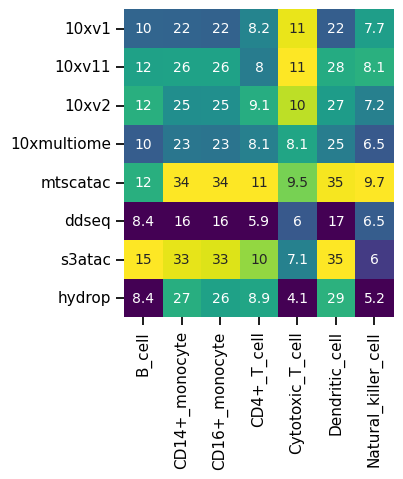

In [397]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(
    data=df_lens_normalized,
    square=True,
    cmap="viridis",
    ax=ax,
    annot=df_lens / 1000,
    annot_kws={"fontsize": 10},
    cbar=False,
)
# sns.heatmap(
#     data=df_merged_pivot_abs, ax=ax, cmap="viridis", annot=True, square=True, alpha=0
# )

# plt.xticks(rotation=45, ha="right")
# plt.title("Number of DARs (x1000)")
# plt.savefig(
#     "plts_final/FIXEDCELLS__ndars_heatmap.png",
#     dpi=600,
#     facecolor="white",
#     bbox_inches="tight",
# )
# plt.savefig(
#     "plts_final/FIXEDCELLS__ndars_heatmap.svg",
#     dpi=600,
#     facecolor="white",
#     bbox_inches="tight",
# )

# male/female DARs

In [437]:
dar_path_dict_dict = {
    y: {
        z.split("/")[-1].split("__")[-2]: z
        for z in sorted(
            glob.glob(
                "harmony_consensus_cell_type__mega_male_female_DARs/" + y + "/*DARs.bed"
            )
        )
    }
    for y in [
        x.split("/")[-1]
        for x in sorted(
            glob.glob("harmony_consensus_cell_type__mega_male_female_DARs/*")
        )
    ]
}
dar_path_dict_dict

{'10xmultiome_celltypefair_1.FIXEDCELLS': {'sampleA_B_cell_VS_sampleB_B_cell': 'harmony_consensus_cell_type__mega_male_female_DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__sampleA_B_cell_VS_sampleB_B_cell__1-2xfoldchange_DARs.bed',
  'sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte': 'harmony_consensus_cell_type__mega_male_female_DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte__1-2xfoldchange_DARs.bed',
  'sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell': 'harmony_consensus_cell_type__mega_male_female_DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell__1-2xfoldchange_DARs.bed',
  'sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell': 'harmony_consensus_cell_type__mega_male_female_DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__sampleA_Cytotoxic_T_cell_VS_sampleB_Cyt

In [438]:
df_merged = pd.DataFrame()
df_merged_10k = pd.DataFrame()
df_lens = pd.DataFrame()
for sample, dar_path_dict in dar_path_dict_dict.items():
    print(sample)
    for cell_type, dar_path in dar_path_dict.items():
        print(cell_type)
        df = pd.read_csv(dar_path, sep="\t", header=None)
        df["sample"] = sample
        df_merged = pd.concat([df_merged, df.iloc[:2000]])
        df_merged_10k = pd.concat([df_merged_10k, df.iloc[:10000]])
        df_lens.at[sample, cell_type] = len(df)

10xmultiome_celltypefair_1.FIXEDCELLS
sampleA_B_cell_VS_sampleB_B_cell
sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte
sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell
sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell
sampleA_Dendritic_cell_VS_sampleB_Dendritic_cell
sampleB_B_cell_VS_sampleA_B_cell
sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte
sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell
sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell
sampleB_Dendritic_cell_VS_sampleA_Dendritic_cell
10xv11_celltypefair_1.FIXEDCELLS
sampleA_B_cell_VS_sampleB_B_cell
sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell
sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell
sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell
sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell
10xv1_celltypefair_1.FIXEDCELLS
sampleA_B_cell_VS_sampleB_B_cell
sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte
sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte
sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell
sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxi

In [439]:
df_merged.columns = [
    "chrom",
    "start",
    "end",
    "cell_type",
    "logfc",
    "strand",
    "p_val",
    "sample",
]
df_merged_10k.columns = [
    "chrom",
    "start",
    "end",
    "cell_type",
    "logfc",
    "strand",
    "p_val",
    "sample",
]

In [440]:
df_merged["tech"] = [x.split("_")[0] for x in df_merged["sample"]]
df_merged_10k["tech"] = [x.split("_")[0] for x in df_merged_10k["sample"]]

In [441]:
df_merged_10k.groupby("tech")["cell_type"].value_counts()

tech         cell_type                                                 
10xmultiome  sampleA_Dendritic_cell_VS_sampleB_Dendritic_cell              10000
             sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell          10000
             sampleB_Dendritic_cell_VS_sampleA_Dendritic_cell              10000
             sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell           3526
             sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte                759
             sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte                202
             sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell                       42
             sampleA_B_cell_VS_sampleB_B_cell                                 15
             sampleB_B_cell_VS_sampleA_B_cell                                  2
             sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell                        1
10xv1        sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell          10000
             sampleA_CD14+_monocyte_V

In [442]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}

cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "CD4+ T cells",
    "Cytotoxic_T_cell": "CD8+ T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
    "CD14+_monocyte",
    "CD16+_monocyte",
    "Dendritic_cell",
]

In [443]:
df_merged["fc"] = 2 ** df_merged["logfc"]

# pivoted heatmap

In [444]:
cell_type_order

['B_cell',
 'CD4+_T_cell',
 'Cytotoxic_T_cell',
 'Natural_killer_cell',
 'CD14+_monocyte',
 'CD16+_monocyte',
 'Dendritic_cell']

In [445]:
male_female_alias_dict

{'sampleA_B_cell_VS_sampleB_B_cell': '♂ B cells',
 'sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte': '♂ CD14+ monocytes',
 'sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte': '♂ CD16+ monocytes',
 'sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell': '♂ Naive T cells',
 'sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell': '♂ Cytotoxic T cells',
 'sampleA_Dendritic_cell_VS_sampleB_Dendritic_cell': '♂ Dendritic cells',
 'sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell': '♂ Natural killer cells',
 'sampleB_B_cell_VS_sampleA_B_cell': '♀ B cells',
 'sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte': '♀ CD14+ monocytes',
 'sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell': '♀ Naive T cells',
 'sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell': '♀ Cytotoxic T cells',
 'sampleB_Dendritic_cell_VS_sampleA_Dendritic_cell': '♀ Dendritic cells',
 'sampleB_Natural_killer_cell_VS_sampleA_Natural_killer_cell': '♀ Natural killer cells'}

In [446]:
male_female_alias_dict = {
    x: x.replace("sampleA", "\u2642")
    .replace("sampleB", "\u2640")
    .split("_VS_")[0]
    .replace("_", " ")
    .replace("CD4+", "Naive")
    + "s"
    for x in [
        "sampleA_B_cell_VS_sampleB_B_cell",
        "sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte",
        "sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte",
        "sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell",
        "sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell",
        "sampleA_Dendritic_cell_VS_sampleB_Dendritic_cell",
        "sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell",
        "sampleB_B_cell_VS_sampleA_B_cell",
        "sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte",
        "sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell",
        "sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell",
        "sampleB_Dendritic_cell_VS_sampleA_Dendritic_cell",
        "sampleB_Natural_killer_cell_VS_sampleA_Natural_killer_cell",
    ]
}
male_female_alias_dict

{'sampleA_B_cell_VS_sampleB_B_cell': '♂ B cells',
 'sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte': '♂ CD14+ monocytes',
 'sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte': '♂ CD16+ monocytes',
 'sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell': '♂ Naive T cells',
 'sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell': '♂ Cytotoxic T cells',
 'sampleA_Dendritic_cell_VS_sampleB_Dendritic_cell': '♂ Dendritic cells',
 'sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell': '♂ Natural killer cells',
 'sampleB_B_cell_VS_sampleA_B_cell': '♀ B cells',
 'sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte': '♀ CD14+ monocytes',
 'sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell': '♀ Naive T cells',
 'sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell': '♀ Cytotoxic T cells',
 'sampleB_Dendritic_cell_VS_sampleA_Dendritic_cell': '♀ Dendritic cells',
 'sampleB_Natural_killer_cell_VS_sampleA_Natural_killer_cell': '♀ Natural killer cells'}

In [447]:
sorted(
    [
        x.replace("sampleA", "\u2642")
        .replace("sampleB", "\u2640")
        .split("_VS_")[0]
        .replace("_", " ")
        .replace("CD4+", "Naive")
        + "s"
        for x in [
            "sampleA_B_cell_VS_sampleB_B_cell",
            "sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte",
            "sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte",
            "sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell",
            "sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell",
            "sampleA_Dendritic_cell_VS_sampleB_Dendritic_cell",
            "sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell",
            "sampleB_B_cell_VS_sampleA_B_cell",
            "sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte",
            "sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell",
            "sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell",
            "sampleB_Dendritic_cell_VS_sampleA_Dendritic_cell",
            "sampleB_Natural_killer_cell_VS_sampleA_Natural_killer_cell",
        ]
    ]
)

['♀ B cells',
 '♀ CD14+ monocytes',
 '♀ Cytotoxic T cells',
 '♀ Dendritic cells',
 '♀ Naive T cells',
 '♀ Natural killer cells',
 '♂ B cells',
 '♂ CD14+ monocytes',
 '♂ CD16+ monocytes',
 '♂ Cytotoxic T cells',
 '♂ Dendritic cells',
 '♂ Naive T cells',
 '♂ Natural killer cells']

In [448]:
male_female_order = [
    "\u2640 B cells",
    "\u2642 B cells",
    "\u2640 CD14+ monocytes",
    "\u2642 CD14+ monocytes",
    "\u2642 CD16+ monocytes",
    "\u2640 Cytotoxic T cells",
    "\u2642 Cytotoxic T cells",
    "\u2640 Dendritic cells",
    "\u2642 Dendritic cells",
    "\u2640 Naive T cells",
    "\u2642 Naive T cells",
    "\u2640 Natural killer cells",
    "\u2642 Natural killer cells",
]

In [449]:
df_merged_pivot = df_merged.pivot_table(
    values="logfc", index="tech", columns="cell_type", aggfunc="median"
)
df_merged_pivot = df_merged_pivot.loc[tech_order]

df_merged_pivot.index = [tech_alias_dict[x] for x in df_merged_pivot.index]

df_merged_pivot.columns = [male_female_alias_dict[x] for x in df_merged_pivot.columns]
df_merged_pivot = df_merged_pivot[male_female_order]

In [450]:
df_merged_pivot

,♀ B cells,♂ B cells,♀ CD14+ monocytes,♂ CD14+ monocytes,♂ CD16+ monocytes,♀ Cytotoxic T cells,♂ Cytotoxic T cells,♀ Dendritic cells,♂ Dendritic cells,♀ Naive T cells,♂ Naive T cells,♀ Natural killer cells,♂ Natural killer cells
10x v1,0.387003,0.675293,NaN,0.900549,0.284172,1.829489,0.585736,0.264684,0.614562,0.454683,0.439401,0.566663,0.291197
10x v1.1,NaN,0.692548,NaN,NaN,NaN,1.240384,0.544512,NaN,NaN,0.379856,0.343699,NaN,NaN
10x v2,0.285296,1.061800,NaN,NaN,NaN,0.626134,0.292192,NaN,NaN,0.477948,0.440219,NaN,NaN
10x Multiome,0.326857,0.540833,0.392270,0.367523,NaN,1.202836,0.502708,1.891127,0.578271,0.322965,0.313896,NaN,NaN
mtscATAC-seq,0.494347,0.315016,0.450005,0.458685,NaN,0.406938,0.286265,NaN,NaN,0.355230,0.350721,NaN,NaN
ddSEQ SureCell,NaN,NaN,0.270015,0.327431,NaN,0.307961,0.852313,NaN,NaN,NaN,NaN,NaN,NaN
s3-ATAC,NaN,NaN,NaN,NaN,NaN,0.501822,0.318315,NaN,NaN,0.382625,NaN,NaN,NaN
HyDrop,NaN,0.344686,NaN,NaN,NaN,0.386292,0.363024,NaN,NaN,0.543922,NaN,NaN,NaN


In [451]:
cell_type_alias_dict

{'B_cell': 'B cells',
 'CD14+_monocyte': 'CD14+ monocytes',
 'CD4+_T_cell': 'CD4+ T cells',
 'Cytotoxic_T_cell': 'CD8+ T cells',
 'Dendritic_cell': 'Dendritic cells',
 'Natural_killer_cell': 'NK cells',
 'CD16+_monocyte': 'CD16+ monocytes'}

### in real values

In [452]:
from sklearn.preprocessing import minmax_scale

In [453]:
df_merged_pivot_abs = 2**df_merged_pivot

df_merged_pivot_abs_normalized = df_merged_pivot_abs.transform(
    lambda x: minmax_scale(x.astype(float))
)

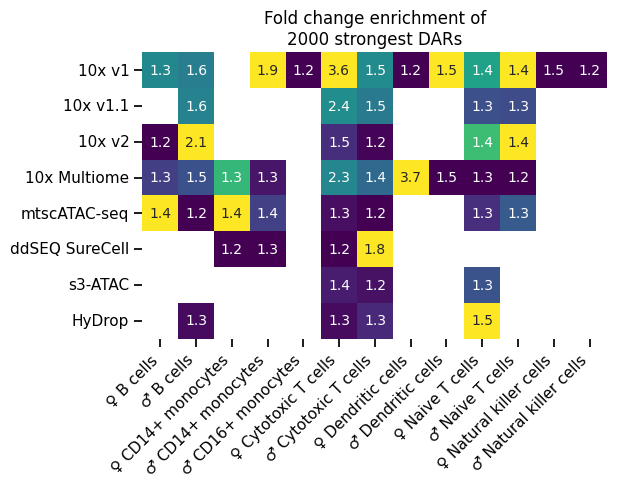

In [454]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(
    data=df_merged_pivot_abs_normalized,
    square=True,
    cmap="viridis",
    ax=ax,
    annot=df_merged_pivot_abs,
    annot_kws={"fontsize": 10},
    cbar=False,
)
plt.xticks(rotation=45, ha="right")
plt.title("Fold change enrichment of\n2000 strongest DARs")
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_top2k_DARs_fc_heatmap.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_top2k_DARs_fc_heatmap.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

# n_DARs

In [455]:
df_lens

,sampleA_B_cell_VS_sampleB_B_cell,sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte,sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell,sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell,sampleA_Dendritic_cell_VS_sampleB_Dendritic_cell,sampleB_B_cell_VS_sampleA_B_cell,sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte,sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell,sampleB_Dendritic_cell_VS_sampleA_Dendritic_cell,sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte,sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell,sampleB_Natural_killer_cell_VS_sampleA_Natural_killer_cell
10xmultiome_celltypefair_1.FIXEDCELLS,15.0,759.0,1.0,3526.0,12245.0,2.0,202.0,42.0,22543.0,13260.0,NaN,NaN,NaN
10xv11_celltypefair_1.FIXEDCELLS,3331.0,NaN,133.0,8659.0,NaN,NaN,NaN,233.0,27402.0,NaN,NaN,NaN,NaN
10xv1_celltypefair_1.FIXEDCELLS,3292.0,5898.0,3662.0,5675.0,109.0,85.0,NaN,144.0,19511.0,1.0,59.0,4.0,2.0
10xv2_celltypefair_1.FIXEDCELLS,7289.0,NaN,3043.0,1442.0,NaN,126.0,NaN,9.0,1888.0,NaN,NaN,NaN,NaN
ddseq_celltypefair_1.FIXEDCELLS,NaN,955.0,NaN,6340.0,NaN,NaN,9.0,NaN,2053.0,NaN,NaN,NaN,NaN
hydrop_celltypefair_1.FIXEDCELLS,1209.0,NaN,NaN,3485.0,NaN,NaN,NaN,7.0,16936.0,NaN,NaN,NaN,NaN
mtscatac_celltypefair_1.FIXEDCELLS,1344.0,1885.0,11.0,2379.0,NaN,993.0,10.0,1403.0,26518.0,NaN,NaN,NaN,NaN
s3atac_celltypefair_1.FIXEDCELLS,NaN,NaN,NaN,3302.0,NaN,NaN,NaN,1000.0,18425.0,NaN,NaN,NaN,NaN


In [456]:
df_lens.index = [x.split("_")[0] for x in df_lens.index]
df_lens = df_lens.loc[tech_order]
df_lens.index = [tech_alias_dict[x] for x in df_lens.index]

df_lens.columns = [male_female_alias_dict[x] for x in df_lens.columns]
df_lens = df_lens[male_female_order]

df_lens_normalized = df_lens.transform(lambda x: minmax_scale(x.astype(float)))
df_lens

,♀ B cells,♂ B cells,♀ CD14+ monocytes,♂ CD14+ monocytes,♂ CD16+ monocytes,♀ Cytotoxic T cells,♂ Cytotoxic T cells,♀ Dendritic cells,♂ Dendritic cells,♀ Naive T cells,♂ Naive T cells,♀ Natural killer cells,♂ Natural killer cells
10x v1,85.0,3292.0,NaN,5898.0,59.0,19511.0,5675.0,1.0,109.0,144.0,3662.0,2.0,4.0
10x v1.1,NaN,3331.0,NaN,NaN,NaN,27402.0,8659.0,NaN,NaN,233.0,133.0,NaN,NaN
10x v2,126.0,7289.0,NaN,NaN,NaN,1888.0,1442.0,NaN,NaN,9.0,3043.0,NaN,NaN
10x Multiome,2.0,15.0,202.0,759.0,NaN,22543.0,3526.0,13260.0,12245.0,42.0,1.0,NaN,NaN
mtscATAC-seq,993.0,1344.0,10.0,1885.0,NaN,26518.0,2379.0,NaN,NaN,1403.0,11.0,NaN,NaN
ddSEQ SureCell,NaN,NaN,9.0,955.0,NaN,2053.0,6340.0,NaN,NaN,NaN,NaN,NaN,NaN
s3-ATAC,NaN,NaN,NaN,NaN,NaN,18425.0,3302.0,NaN,NaN,1000.0,NaN,NaN,NaN
HyDrop,NaN,1209.0,NaN,NaN,NaN,16936.0,3485.0,NaN,NaN,7.0,NaN,NaN,NaN


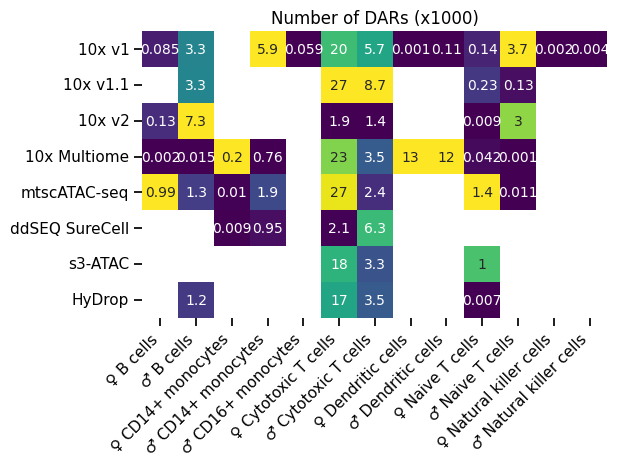

In [457]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(
    data=df_lens_normalized,
    square=True,
    cmap="viridis",
    ax=ax,
    annot=df_lens / 1000,
    annot_kws={"fontsize": 10},
    cbar=False,
)
# sns.heatmap(
#     data=df_merged_pivot_abs, ax=ax, cmap="viridis", annot=True, square=True, alpha=0
# )

plt.xticks(rotation=45, ha="right")
plt.title("Number of DARs (x1000)")
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_ndars_heatmap.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_ndars_heatmap.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

# subset to cytotoxic T cells and B cells

In [458]:
dar_path_dict_dict = {
    y: {
        z.split("/")[-1].split("__")[-2]: z
        for z in sorted(
            glob.glob(
                "harmony_consensus_cell_type__mega_male_female_DARs/" + y + "/*DARs.bed"
            )
        )
    }
    for y in [
        x.split("/")[-1]
        for x in sorted(
            glob.glob("harmony_consensus_cell_type__mega_male_female_DARs/*")
        )
    ]
}
dar_path_dict_dict

{'10xmultiome_celltypefair_1.FIXEDCELLS': {'sampleA_B_cell_VS_sampleB_B_cell': 'harmony_consensus_cell_type__mega_male_female_DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__sampleA_B_cell_VS_sampleB_B_cell__1-2xfoldchange_DARs.bed',
  'sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte': 'harmony_consensus_cell_type__mega_male_female_DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte__1-2xfoldchange_DARs.bed',
  'sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell': 'harmony_consensus_cell_type__mega_male_female_DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell__1-2xfoldchange_DARs.bed',
  'sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell': 'harmony_consensus_cell_type__mega_male_female_DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__sampleA_Cytotoxic_T_cell_VS_sampleB_Cyt

In [459]:
df_merged = pd.DataFrame()
df_merged_10k = pd.DataFrame()
df_lens = pd.DataFrame()
for sample, dar_path_dict in dar_path_dict_dict.items():
    print(sample)
    for cell_type, dar_path in dar_path_dict.items():
        if "Cytotoxic" in cell_type or "B_cell" in cell_type:
            print(cell_type)
            df = pd.read_csv(dar_path, sep="\t", header=None)
            df["sample"] = sample
            df_merged = pd.concat([df_merged, df.iloc[:200]])
            df_merged_10k = pd.concat([df_merged_10k, df.iloc[:10000]])
            df_lens.at[sample, cell_type] = len(df)
            print(2 ** min(df[4]))

10xmultiome_celltypefair_1.FIXEDCELLS
sampleA_B_cell_VS_sampleB_B_cell
1.311838246315104
sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell
1.2000664052124528
sampleB_B_cell_VS_sampleA_B_cell
1.2296235125538617
sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell
1.2000046241683713
10xv11_celltypefair_1.FIXEDCELLS
sampleA_B_cell_VS_sampleB_B_cell
1.2000729207327856
sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell
1.2000074809109393
sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell
1.2001613517655523
10xv1_celltypefair_1.FIXEDCELLS
sampleA_B_cell_VS_sampleB_B_cell
1.200047208341312
sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell
1.2000388338294723
sampleB_B_cell_VS_sampleA_B_cell
1.2000556074449464
sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell
1.2001206885558073
10xv2_celltypefair_1.FIXEDCELLS
sampleA_B_cell_VS_sampleB_B_cell
1.2000573160078698
sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell
1.2000078422566967
sampleB_B_cell_VS_sampleA_B_cell
1.2000493764198792

In [460]:
df_merged.columns = [
    "chrom",
    "start",
    "end",
    "cell_type",
    "logfc",
    "strand",
    "p_val",
    "sample",
]
df_merged_10k.columns = [
    "chrom",
    "start",
    "end",
    "cell_type",
    "logfc",
    "strand",
    "p_val",
    "sample",
]

In [461]:
df_merged["tech"] = [x.split("_")[0] for x in df_merged["sample"]]
df_merged_10k["tech"] = [x.split("_")[0] for x in df_merged_10k["sample"]]

In [462]:
df_merged_10k.groupby("tech")["cell_type"].value_counts()

tech         cell_type                                           
10xmultiome  sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell    10000
             sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell     3526
             sampleA_B_cell_VS_sampleB_B_cell                           15
             sampleB_B_cell_VS_sampleA_B_cell                            2
10xv1        sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell    10000
             sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell     5675
             sampleA_B_cell_VS_sampleB_B_cell                         3292
             sampleB_B_cell_VS_sampleA_B_cell                           85
10xv11       sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell    10000
             sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell     8659
             sampleA_B_cell_VS_sampleB_B_cell                         3331
10xv2        sampleA_B_cell_VS_sampleB_B_cell                         7289
             sampleB_Cytotoxic_T_c

In [463]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}

cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "CD4+ T cells",
    "Cytotoxic_T_cell": "CD8+ T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
    "CD14+_monocyte",
    "CD16+_monocyte",
    "Dendritic_cell",
]

# pivoted heatmap

In [464]:
male_female_order = [
    "\u2640 B cells",
    "\u2642 B cells",
    "\u2640 Cytotoxic T cells",
    "\u2642 Cytotoxic T cells",
]

In [465]:
df_merged_pivot = df_merged.pivot_table(
    values="logfc", index="tech", columns="cell_type", aggfunc="median"
)
df_merged_pivot = df_merged_pivot.loc[tech_order]

df_merged_pivot.index = [tech_alias_dict[x] for x in df_merged_pivot.index]

df_merged_pivot.columns = [male_female_alias_dict[x] for x in df_merged_pivot.columns]
df_merged_pivot = df_merged_pivot[male_female_order]

df_merged_pivot

,♀ B cells,♂ B cells,♀ Cytotoxic T cells,♂ Cytotoxic T cells
10x v1,0.387003,1.129054,1.878470,0.698462
10x v1.1,NaN,0.987898,1.261168,0.615304
10x v2,0.285296,2.301885,1.143587,0.354340
10x Multiome,0.326857,0.540833,1.230349,0.568570
mtscATAC-seq,0.676860,0.377363,0.452156,0.317892
ddSEQ SureCell,NaN,NaN,0.347286,1.309797
s3-ATAC,NaN,NaN,0.528791,0.388494
HyDrop,NaN,0.392086,0.413717,0.425903


### in real values

In [466]:
from sklearn.preprocessing import minmax_scale

In [467]:
df_merged_pivot_abs = 2**df_merged_pivot

df_merged_pivot_abs_normalized = df_merged_pivot_abs.transform(
    lambda x: minmax_scale(x.astype(float))
)

In [468]:
df_merged_pivot_abs_normalized

,♀ B cells,♂ B cells,♀ Cytotoxic T cells,♂ Cytotoxic T cells
10x v1,0.234250,0.244541,1.000000,0.305272
10x v1.1,NaN,0.188414,0.467725,0.231529
10x v2,0.000000,1.000000,0.389711,0.025875
10x Multiome,0.093731,0.042909,0.446658,0.191913
mtscATAC-seq,1.000000,0.000000,0.039888,0.000000
ddSEQ SureCell,NaN,NaN,0.000000,1.000000
s3-ATAC,NaN,NaN,0.070926,0.050722
HyDrop,NaN,0.003668,0.024930,0.078621


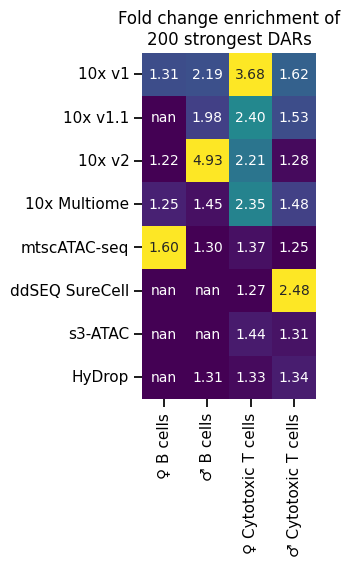

In [478]:
fig, ax = plt.subplots(figsize=(4.5, 4.5))
sns.heatmap(
    data=df_merged_pivot_abs_normalized.fillna(value=0),
    square=True,
    cmap="viridis",
    ax=ax,
    annot=df_merged_pivot_abs,
    annot_kws={"fontsize": 10},
    cbar=False,
    fmt=".2f",
)
# plt.xticks(rotation=45, ha="right")

# sns.heatmap(
#     data=df_merged_pivot_abs, ax=ax, cmap="viridis", annot=True, square=True, alpha=0
# )

# plt.xticks(rotation=45, ha="right")
plt.title("Fold change enrichment of\n200 strongest DARs")
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_selected_top2k_DARs_fc_heatmap.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_selected_top2k_DARs_fc_heatmap.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

# n_DARs

In [475]:
df_lens.index = [x.split("_")[0] for x in df_lens.index]

In [476]:
df_lens = df_lens.loc[tech_order]

df_lens.index = [tech_alias_dict[x] for x in df_lens.index]

df_lens.columns = [male_female_alias_dict[x] for x in df_lens.columns]
df_lens = df_lens[male_female_order]

df_lens_normalized = df_lens.transform(lambda x: minmax_scale(x.astype(float)))

KeyError: "None of [Index(['10xv1', '10xv11', '10xv2', '10xmultiome', 'mtscatac', 'ddseq',\n       's3atac', 'hydrop'],\n      dtype='object')] are in the [index]"

In [ ]:
df_lens

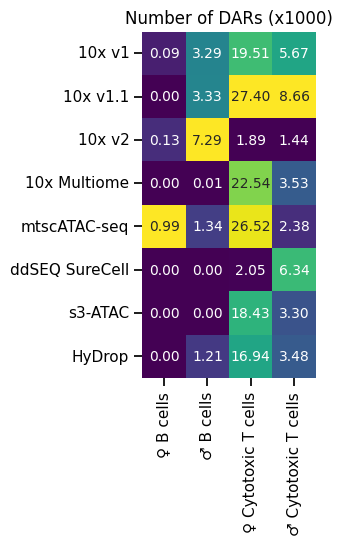

In [477]:
fig, ax = plt.subplots(figsize=(4.5, 4.5))
sns.heatmap(
    data=df_lens_normalized.fillna(value=int(0)),
    square=True,
    cmap="viridis",
    ax=ax,
    annot=(df_lens / 1000).fillna(value=int(0)),
    annot_kws={"fontsize": 10},
    cbar=False,
    fmt=".2f",
)


# plt.xticks(rotation=45, ha="right")
plt.title("Number of DARs (x1000)")
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_selected_ndars_heatmap.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_selected_ndars_heatmap.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)